<a href="https://colab.research.google.com/github/leticiaaraujoUCL/IA-UCL/blob/main/Regressao_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regressão Linear**

Materiais:


*   [Link](https://medium.com/@ulissesmaffa/machine-learning-regress%C3%A3o-linear-816b2ad6429)
*   [Link
](https://medium.com/@lauradamaceno/regress%C3%A3o-linear-6a7f247c3e29)



In [ ]:
!pip3 install control
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 6.2 MB/s eta 0:00:00


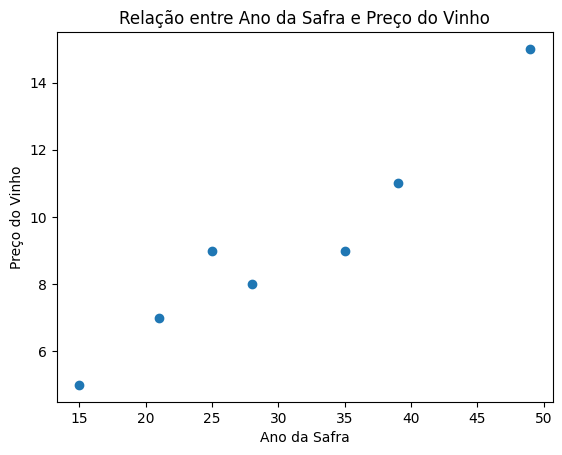

In [ ]:
# Gerar dados fictícios
X = np.array([15,21,25,28,35,39,49])
Y = np.array([5,7,9,8,9,11,15])

# Visualizar os dados
plt.scatter(X, Y)
plt.xlabel("Ano da Safra")
plt.ylabel("Preço do Vinho")
plt.title("Relação entre Ano da Safra e Preço do Vinho")
plt.show()

Antes de começarmos a otimizar nossos coeficientes, precisamos dar a eles um ponto de partida. Um método comum é iniciar esses coeficientes com valores aleatórios. Pode parecer estranho começar com um chute aleatório, mas essa é a beleza do método de gradiente descendente: ele nos ajudará a ajustar esses valores com base nos dados!

Vamos definir m e b utilizando valores aleatórios entre -10 e 10. Esse range é apenas uma escolha arbitrária, mas serve como um bom ponto de partida.

Tenha em mente que cada vez que executarmos este código, m e b terão valores diferentes. E mesmo começando de pontos diferentes, o gradiente descendente nos ajudará a encontrar os melhores valores para esses coeficientes!

In [ ]:
# Definindo m e b iniciais aleatoriamente
m = random.uniform(-10, 10)
b = random.uniform(-10, 10)

print("Valor inicial de m:", m)
print("Valor inicial de b:", b)

Valor inicial de m: 8.903366856821705
Valor inicial de b: -8.642446924022115


Este é o coração do algoritmo de regressão linear. É aqui que o ajuste da reta acontece, iterativamente, usando o método do Gradiente Descendente.

Épocas (ou Iterações): Definimos o número de épocas, que é o número de vezes que vamos ajustar a reta. Em cada época, ajustamos a reta com base em todos os pontos dos nossos dados.
Taxa de Aprendizado (ou Alpha): É um parâmetro que determina o tamanho do passo que damos na direção oposta ao gradiente. Se for muito grande, podemos ultrapassar o mínimo, e se for muito pequeno, pode demorar muito para convergir.
Loop Interno (Por Ponto): Para cada ponto dos nossos dados, fazemos o seguinte:
- Calculamos a previsão ypred​ usando a equação da reta.
- Calculamos o erro como a diferença entre o valor previsto e o real.
- Atualizamos a soma total do custo.
- Calculamos os gradientes em relação a m e b.
Atualização de m e b: Usando o gradiente (derivado no Passo 3), ajustamos m e b. Isso nos move na direção oposta ao gradiente, com um passo proporcional ao alpha.
Plotagem dos Dados e da Reta: Finalmente, após todas as épocas, plotamos os dados originais e a reta ajustada para visualização.

m: 0.4489942925683121 b: -5.153270448963428
Custo: 35.724956901933


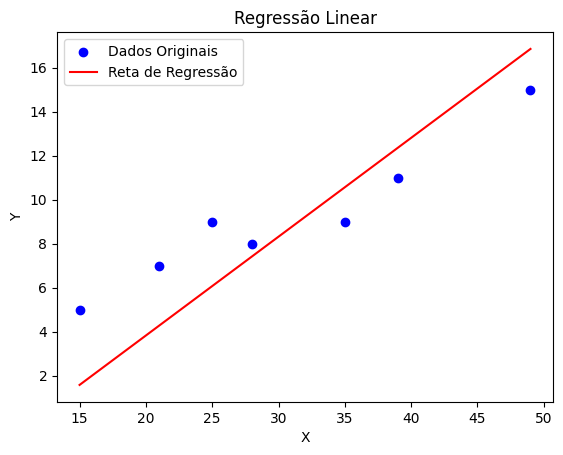

In [ ]:

# Definição de épocas e alpha
epochs = 1000
alpha=0.0001
# Primeiro FOR
for epoch in range(epochs):
  c_dm=0
  c_db=0
  custo=0
  # Segundo FOR (por ponto)
  for xi, yi in zip(X, Y):
    y_pred = m * xi + b
    erro = y_pred - yi
    custo += erro**2
    c_dm += 2 * erro * xi #gradiente do m
    c_db += 2 * erro #gradiente do b

  # Atualizando o m e o b
  m -= alpha * c_dm
  b -= alpha * c_db

print("m:", m, "b:", b)
print("Custo:", custo)

# Plotando os dados originais
plt.scatter(X, Y, color='blue', label='Dados Originais')

# Gerando pontos para a reta
X_line = np.linspace(min(X), max(X), 100)  # 100 pontos entre o mínimo e máximo de X_data
Y_line = m * X_line + b

# Plotando a reta
plt.plot(X_line, Y_line, color='red', label='Reta de Regressão')

# Configurações do gráfico
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Regressão Linear")
plt.legend()
plt.show()  # Exibe o gráfico

In [ ]:
# Cálculo de R²
y_pred = m * X + b
ss_total = np.sum((Y - np.mean(Y)) ** 2)  # Soma total dos quadrados
ss_residual = np.sum((Y - y_pred) ** 2)  # Soma dos quadrados residuais
r2 = 1 - (ss_residual / ss_total)

# Cálculo de MAE
mae = np.mean(np.abs(Y - y_pred))

# Exibindo os resultados
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.4f}")

R²: 0.4131
MAE: 2.0599


In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# variável preditora
X = np.array([ 220, 220, 220, 220, 220, 225, 225, 225, 225, 225, 230, 230, 230, 230, 230, 235, 235, 235, 235, 235 ])
# variável alvo
y = np.array([ 137, 137, 137, 136, 135, 135, 133, 132, 133, 133, 128, 124, 126, 129, 126, 122, 122, 122, 119, 122 ])

In [ ]:
df = pd.DataFrame()
df['x'] = X
df['y'] = y
# passando os valores de x e y como Dataframes
x_v = df[['x']]
y_v = df[['y']]
# criando e treinando o modelo
model = LinearRegression()
model.fit(x_v, y_v)
# para visualizar os coeficientes encontrados
model.coef_
# para visualizar o R²
model.score(x_v, y_v)
# mostrando as previsões para o mesmo conjunto passado
# model.predict(x_v)

0.9417657045840407